# Project2 Part1 - Text Analysis through TFIDF computation


In [104]:
import numpy as np
from collections import OrderedDict

from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim

import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
# run text_analyzer.py with default arguments
!python text_analyzer.py


Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 5), ('to', 4), ('and', 3), ('that', 2), ('might', 2), ('but', 2), ('by', 2), ('his', 2), ('tender', 2), ('thou', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('from', 1), ('fairest', 1), ('creatures', 1), ('we', 1), ('desire', 1)]

Corpus TF (Top 20):
[('and', 491), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 343), ('in', 322), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('is', 168), ('a', 166), ('not', 166), ('me', 164), ('but', 163), ('thee', 162), ('love', 162), ('so', 144)]

Corpus IDF (Top 20):
[('abhor', 5.0369526024136295), ('able', 5.0369526024136295), ('about', 5.0369526024136295), ('abundant', 5.0369526024136295), ('abused', 5.0369526024136295), ('abuses', 5.0369526024136295), ('abysm', 5.0369526024136295), ('accents', 5.0369526024136295), ('acceptable', 5.0369526024136295), ('acceptance', 5.0369526024136295), ('accessary', 5.0369526024136295), ('accident', 5.0369526024136295)

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

#### TODO: answer here

I'm very familiar with argparse from other python projects. The '-i' and '--input' switches have the same functionality and the optional argument is stored (when entered) as args.input. The sonnet filepath would come after the input switch to specify a non-default sonnet1 argument to scan (see very bottom running on sonnet #69 for example).
It is also possible to use positional arguments like sys.argv[1] and sys.argv[2], however argparse is much nicer in that the location of the argument is flexible and the switch before the argument makes it very clear which argument is being passed where.

## b. Read and Clean the data

In [106]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [107]:
corpus['1'] # keys 1-154 for all sonnets (type: str)

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

## c. TF

In [108]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']

# determine tf of sonnet
sonnet1_tf = tf(sonnet1)

# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,5
2,to,4
3,and,3
4,that,2
5,might,2
6,but,2
7,by,2
8,his,2
9,tender,2


In [109]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,and,491
1,the,430
2,to,408
3,my,397
4,of,372
5,i,343
6,in,322
7,that,320
8,thy,287
9,thou,235


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

#### TODO: answer here

It is clear that the frequent words do not add much information to a sonnet as they are mostly articles/prepositions that do not indicate action or descriptions that specifically adds meaning to a sonnet. TF IDF can help add more meaning by taking in consideration the frequency a word appears in a document as well as inversely measures the importance of a term in a document. To be more precise, common terms have a lower IDF score while rarer terms have a higher IDF score because it denotes some measure of importance. So common prepositions like “the” or “and” have lower weights while rare words have higher weights.

This representation is useful as a tf. A helpful alternative could be a tally of how many documents a word is found in. You could also have a [tf_score, sonnets_word_occurs_in] list printed out which would be very helpful to see if most common words are evenly spread across most sonnets or are more heavily concentrated in fewer sonnets.

There will be some noise because not every word categorization is as disparate. Furthermore, these words that are common will introduce noise if they are not properly filtered out since they appear so much. This re-emphasizes the importance data filtration. Additionally, some words could be ambiguous or be Out of Vocabulary words. In the first case, word meanings change over time or have multiple meanings and if the representation does not capture the proper meaning accurately, then the document discrimination accuracy is hindered. And in the OOV case, there could be words that are not in the training vocabulary and as a result the representations do not have any significant meaning. And in our case, there is noise as seen later in the assignment by the heat-map representation of the confusion matrix.


## d. IDF

In [110]:
# IDF of corpus
corpus_idf = idf(corpus)

corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,abhor,5.036953
1,able,5.036953
2,about,5.036953
3,abundant,5.036953
4,abused,5.036953
5,abuses,5.036953
6,abysm,5.036953
7,accents,5.036953
8,acceptable,5.036953
9,acceptance,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

#### TODO: answer here

The top idf words are all very specific and presumably have a singular occurrence in corpus. None of these words are filler besides perhaps 'about'. These words all have distinct meaning and can give more insight on a sonnet than any of the top tf words. These are 'rare' words in a sense.

## e. TF-IDF

In [111]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)
sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,worlds,7.301316
1,tender,6.490386
2,feedst,5.036953
3,lights,5.036953
4,selfsubstantial,5.036953
5,fuel,5.036953
6,famine,5.036953
7,foe,5.036953
8,herald,5.036953
9,gaudy,5.036953


### Q. What is different with this list than just using TF?

#### TODO: answer here

The tfidf emphasizes words unique to a sonnet and rarely occuring in other sonnets of the corpus. It shows what words make a sonnet important and unique. Common words are filtered out through this calculation.
Using just tf shows overall popular words but gives almost no insight to an individual sonnet's uniqueness because there is no weighting, unlike the tfidf score.


## f. Compare all documents

In [112]:
# TODO: Visualize as a heatmap
sonnet_len = len(corpus.keys())

sim_matrix = np.zeros([sonnet_len, sonnet_len]) # 154,154

# '1' = tfidf_score
# '154' = tfidf_score
sonnet_tfidf_dict = OrderedDict.fromkeys(corpus)
for i in range(1, sonnet_len + 1): # 1-indexed

    sonnet_num = str(i) # '1'
    sonnet_curr = corpus[sonnet_num] # retrieve sonnet words from corpus (list)
    sonnet_num_tf = tf(sonnet_curr) # tf score (Dict)

    sonnet_num_tfidf = tf_idf(corpus_idf, sonnet_num_tf) # tfidf score (Dict)

    sonnet_tfidf_dict[sonnet_num] = sonnet_num_tfidf # sonnet_tfidf_dict['1'] = tfidf_score


In [113]:
for i in range(1, sonnet_len + 1): # 1-indexed
    for j in range(1, sonnet_len + 1):  # 1-indexed
        sonnet1 = str(i)
        sonnet2 = str(j)

        s1_tfidf = sonnet_tfidf_dict[sonnet1]
        s2_tfidf = sonnet_tfidf_dict[sonnet2]

        sim_matrix[i-1][j-1] = cosine_sim(s1_tfidf, s2_tfidf)

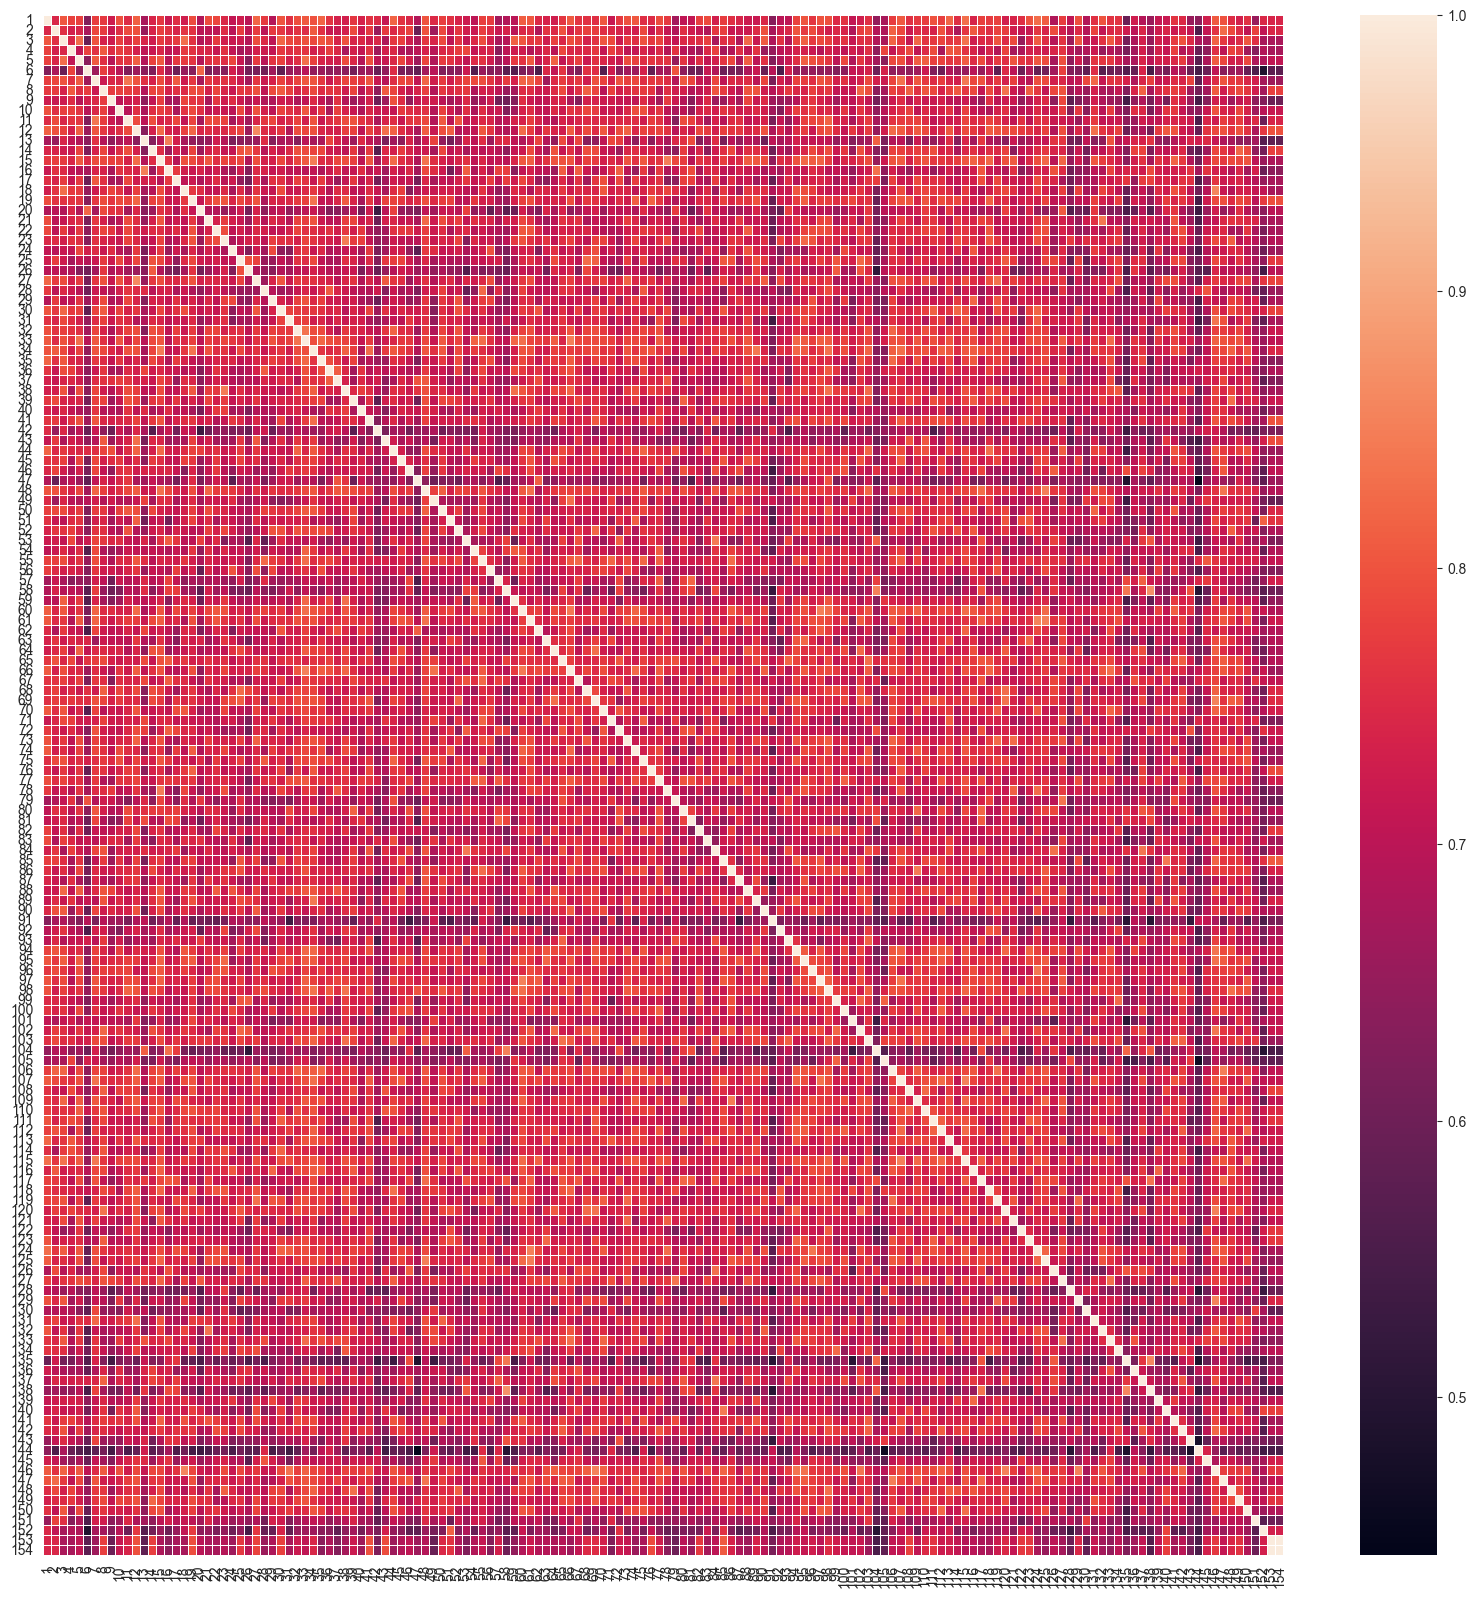

In [114]:
# from sklearn.metrics import confusion_matrix
#
# print(confusion_matrix(sim_matrix))
import seaborn as sns
import matplotlib.pylab as plt

xlabels = [ int(x) + 1 for x in range(sonnet_len) ]
ylabels = xlabels

fig, ax = plt.subplots(figsize=(20, 20))
# do labeling starting at 1 and going to 154 for the heatmap?
sns.heatmap(sim_matrix, linewidth= .5, xticklabels=xlabels, yticklabels=ylabels)

plt.show()

### Q. Observe the heatmap. What insight do you get from it?

#### TODO: answer here

Perfect similarity is 1.0 and would only occur with identical sonnets. I did not exclude calculations comparing a sonnet with itself, and we see the 1.0 similarities at the union of the x and y coordinates of the same sonnet. This creates the diagonal from top left going to bottom right.
The bottom right shows that sonnet 153 also has a 1.0 score when compared to sonnet 154, and I looked at the text files and the sonnets are in fact identical. This could be a mistake or intentional to test our observation skills. Manually I would not have checked all 154 sonnets comparing them to each other, so the heatmap allows for much quicker insights on the similarity scores between sonnets.

Absolutely no similarity would be represented by 0.0, but we don't see that occur here. The minimum similarity score shown is roughly 0.45.
I was surprised that none of the sonnets were less than roughly 0.45 similarity, but then I understood why. Common filler words such as 'the' and 'and' and 'for' will be common throughout and will have little specific meaning to a sonnet so this makes sense that there will always be overlap with this many sonnets observed. All sonnets need common bridge words between verbs and nouns, so the top tf-scores are basically the reason that we don't see any similarity scores close to 0.0.

Some sonnets that are most distinct are shown by nearly white lines. Most unique sonnets include numbers: 6, 42, 91, 104, 105, 135, 144.

Most similar sonnets, excluding the duplicate sonnets of 153 and 154 include numbers: 33, 60, 106, 146-149.
It is harder to visually pick out most similar sonnets that aren't 1.0 since those are more common and many sonnets have cosine similarity scores in the 75% range give or take.

The most unique sonnets most likely share the least words in the top corpus tf scores and/or contain the most unique words.

The least unique sonnets most likely share many words with other sonnets from the top corpus tf scores and have among the least distinct words.


In [115]:
# run text_analyzer.py with sonnet 69 as input file
!python text_analyzer.py -i "data/sonnets/69.txt"


Sonnet 69 TF (Top 20):
[('the', 7), ('that', 6), ('thy', 6), ('of', 5), ('thee', 3), ('those', 2), ('eye', 2), ('tongues', 2), ('give', 2), ('so', 2), ('outward', 2), ('praise', 2), ('is', 2), ('but', 2), ('in', 2), ('this', 2), ('by', 2), ('they', 2), ('their', 2), ('parts', 1)]

Corpus TF (Top 20):
[('and', 491), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 343), ('in', 322), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('is', 168), ('a', 166), ('not', 166), ('me', 164), ('but', 163), ('thee', 162), ('love', 162), ('so', 144)]

Corpus IDF (Top 20):
[('abhor', 5.0369526024136295), ('able', 5.0369526024136295), ('about', 5.0369526024136295), ('abundant', 5.0369526024136295), ('abused', 5.0369526024136295), ('abuses', 5.0369526024136295), ('abysm', 5.0369526024136295), ('accents', 5.0369526024136295), ('acceptable', 5.0369526024136295), ('acceptance', 5.0369526024136295), ('accessary', 5.0369526024136295), ('accident', 5.0369526024136295), ('ac

In [116]:
sim_score_avg_dict = {}

for i in range(1, sonnet_len + 1): # 1-indexed
    sim_row_sum = -1.0 # to cancel out the sonnet and itself 1.0 score
    for j in range(1, sonnet_len + 1):  # 1-indexed

        sim_row_sum += sim_matrix[i-1][j-1]

    sim_score_avg = sim_row_sum / sonnet_len
    sonnet_num = str(i)
    sim_score_avg_dict[sonnet_num] = sim_score_avg

# print(f'{sim_score_avg_dict = }')

sorted_sim_score_avg_list = sorted(sim_score_avg_dict.items(), key=lambda x:x[1])
print(f'{sorted_sim_score_avg_list = }')

sorted_sim_score_avg_list = [('144', 0.6011773443642228), ('135', 0.6289753824314299), ('91', 0.6329775878602854), ('152', 0.6420643582644506), ('6', 0.6472478565174729), ('104', 0.6484123205204075), ('138', 0.6515082638002062), ('128', 0.651849936980027), ('42', 0.652230711389219), ('47', 0.6573410099736112), ('105', 0.6602182074796791), ('130', 0.6627823731600814), ('143', 0.6710332909126963), ('151', 0.6715489085525582), ('26', 0.6754393576740386), ('58', 0.6763515092424317), ('20', 0.6821141530593056), ('13', 0.6869061450539413), ('101', 0.6871509789691561), ('43', 0.6879004977776654), ('57', 0.6891667950862638), ('79', 0.6892098432200646), ('122', 0.6894477813348073), ('136', 0.6901912123522046), ('153', 0.6926994098035554), ('154', 0.6926994098035554), ('145', 0.6930822297879536), ('140', 0.6936936237719227), ('92', 0.6941849214120422), ('9', 0.6949218152289895), ('53', 0.696870262369649), ('28', 0.6991578898083763), ('81', 0.6998027054948137), ('49', 0.6998373904563101), ('24', 

Now, instead of manually looking at heatmap rows, we can see that average similarity for a sonnet ranks sonnets 146, 33, 15, 34, and 48 as the most similar sonnets to the rest. The average similarity scores here are roughly 0.75.

The least similar sonnets are 144, 135, 91, 152, and 6 with average similarity close to 0.60.

This is more precise than manually looking at the heatmap, but the heatmap is helpful to break down the trends initially.

In [117]:
low_to_high_similarity = []

for sonnet_num in sorted_sim_score_avg_list:
    index = int(sonnet_num[0]) - 1
    low_to_high_similarity.append(sim_matrix[index])

xlabels = []
xlabels = [ int(x[0]) for x in sorted_sim_score_avg_list ]
ylabels = xlabels

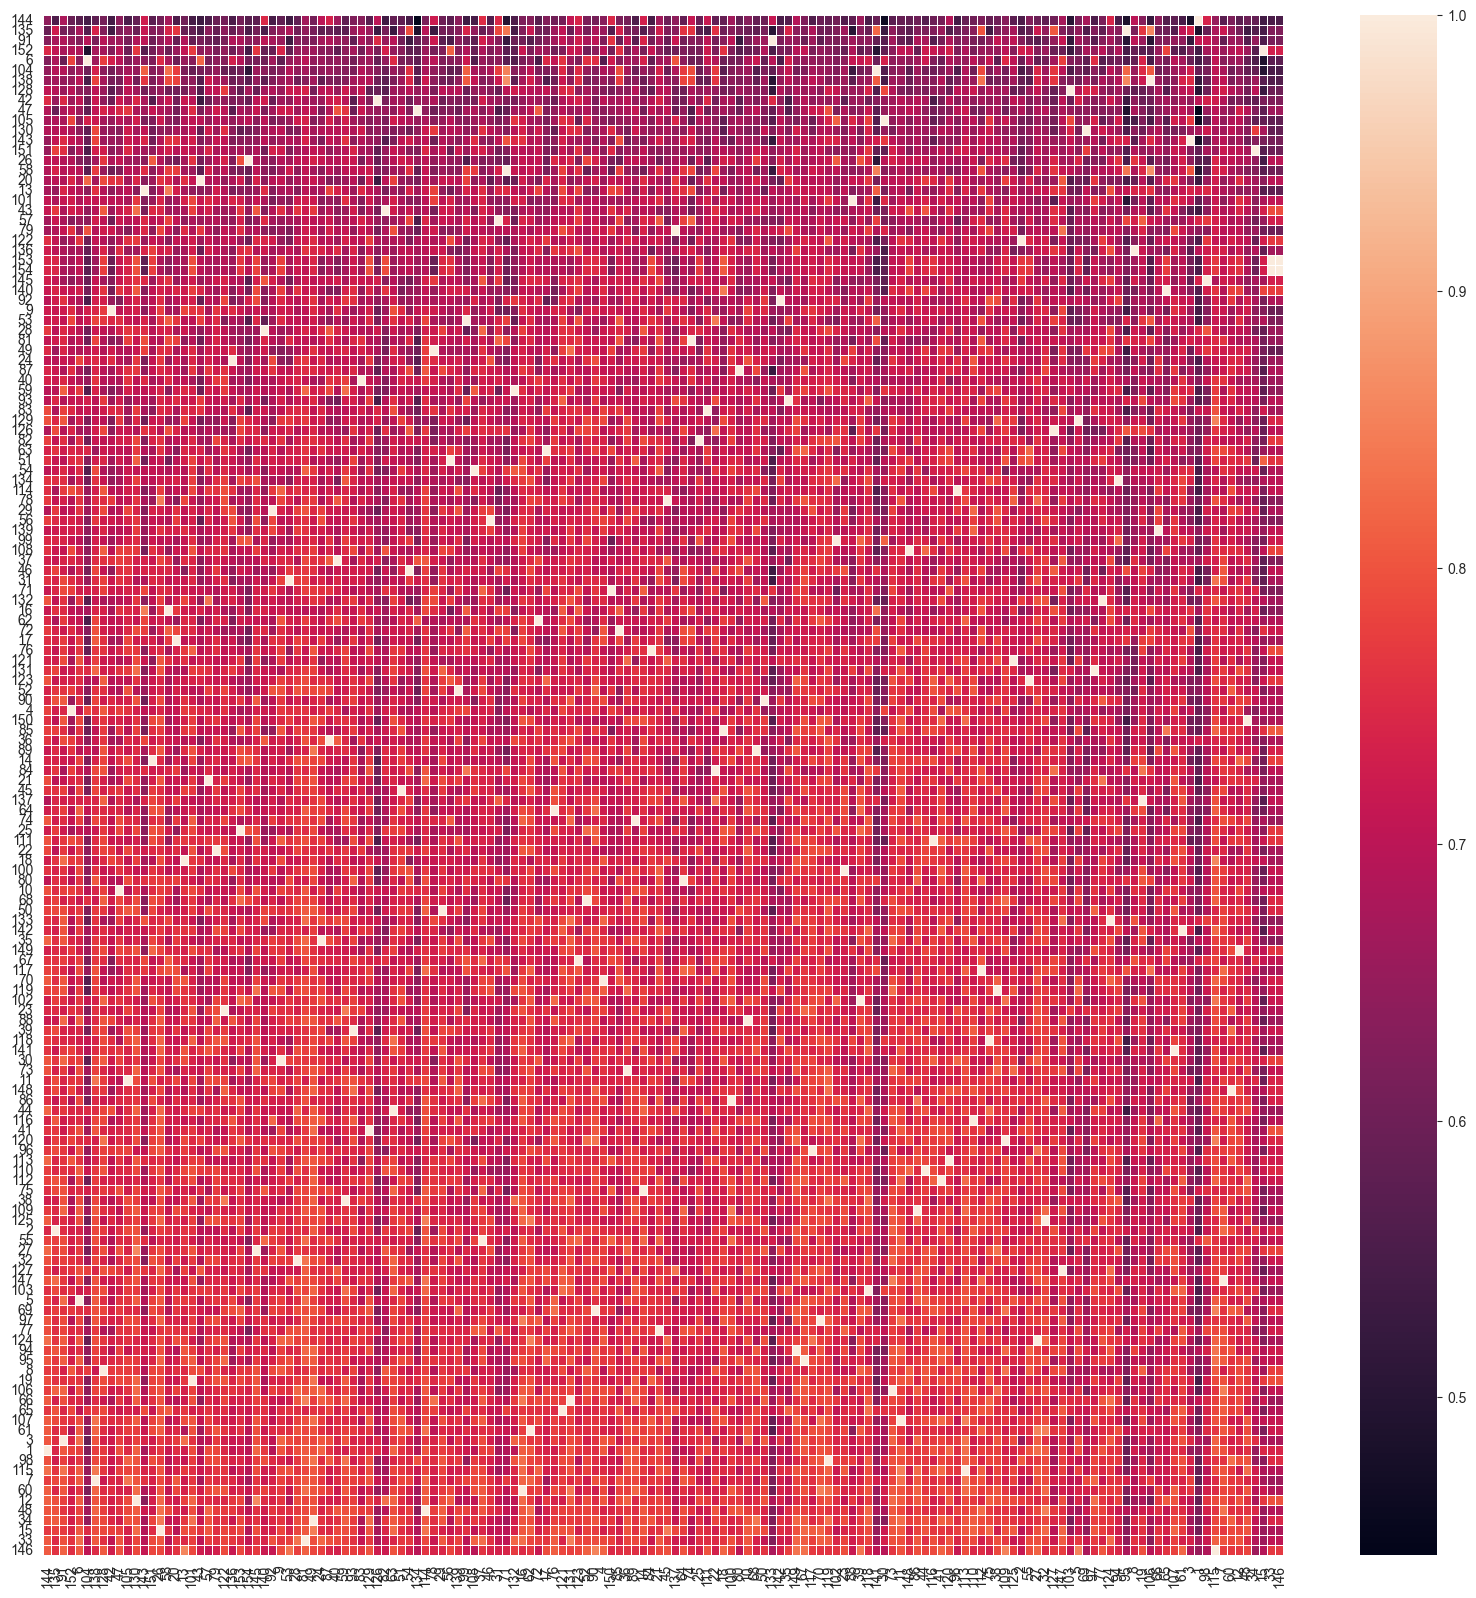

In [118]:
fig, ax = plt.subplots(figsize=(20, 20))
# do labeling starting at 1 and going to 154 for the heatmap?
sns.heatmap(low_to_high_similarity, linewidth= .5, xticklabels=xlabels, yticklabels=ylabels)

plt.show()

This heatmap shows an organized ranking of least similar to most similar sonnets now. The diagonal is missing of course given that the order is not sequential anymore.

PDF questions not addressed above

1.1 c) We can view each tuple as a sort of key-value pair. Is there another built-in Python type that we could have used instead?

We could use a dictionary since that also uses key, value pairs

1.1 d) Observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

The top 20 corpus words are all meaningless words but the top idf words all unique and give meaning to the sonnets they appear in.

1.2 b) python text_analyzer.py --help
What does this print? Which lines of code in text analyzer.py cause this to be printed?

`parser = argparse.ArgumentParser(description="Text Analysis through TFIDF computation", formatter_class=argparse.ArgumentDefaultsHelpFormatter,)`

This prints a help message on how to use argparse for running the script.
